In [1]:
import glob
import os
folder_path = '/home/osero/Downloads/bsign_class_examples-20240913T220735Z-001/bsign_class_examples/'
files = [os.path.basename(file) for file in glob.glob(os.path.join(folder_path, '*')) if os.path.isfile(file)]
files

['0694.mp4',
 '0189.mp4',
 '0357.mp4',
 '0183.mp4',
 '0537.mp4',
 '0580.mp4',
 '0488.mp4',
 '0094.mp4',
 '0202.mp4',
 '0411.mp4',
 '0685.mp4',
 '0115.mp4',
 '0119.mp4',
 '0568.mp4',
 '0723.mp4',
 '0473.mp4',
 '0700.mp4',
 '0628.mp4',
 '0336.mp4',
 '0344.mp4',
 '0443.mp4',
 '0691.mp4',
 '0527.mp4',
 '0669.mp4',
 '0153.mp4',
 '0056.mp4',
 '0585.mp4',
 '0355.mp4',
 '0334.mp4',
 '0518.mp4',
 '0282.mp4',
 '0642.mp4',
 '0112.mp4',
 '0050.mp4',
 '0267.mp4',
 '0643.mp4',
 '0064.mp4',
 '0577.mp4',
 '0423.mp4',
 '0676.mp4',
 '0491.mp4',
 '0738.mp4',
 '0276.mp4',
 '0564.mp4',
 '0096.mp4',
 '0666.mp4',
 '0121.mp4',
 '0548.mp4',
 '0230.mp4',
 '0325.mp4',
 '0233.mp4',
 '0172.mp4',
 '0732.mp4',
 '0553.mp4',
 '0361.mp4',
 '0362.mp4',
 '0076.mp4',
 '0371.mp4',
 '0227.mp4',
 '0274.mp4',
 '0624.mp4',
 '0559.mp4',
 '0018.mp4',
 '0376.mp4',
 '0534.mp4',
 '0532.mp4',
 '0038.mp4',
 '0737.mp4',
 '0148.mp4',
 '0689.mp4',
 '0569.mp4',
 '0043.mp4',
 '0736.mp4',
 '0478.mp4',
 '0010.mp4',
 '0507.mp4',
 '0508.mp4',

In [2]:
import cv2 
from matplotlib import pyplot as plt
from PIL import Image

all_images = []

for file_path in files:
    # Open the video file
    video_path = folder_path + file_path
    video_capture = cv2.VideoCapture(video_path)

    # Get the total number of frames
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the index of the middle frame
    middle_frame_index = total_frames // 2

    # Set the video capture to the middle frame
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_index)

    # Read the middle frame
    success, img = video_capture.read()
    # gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # plt.imshow(Image.fromarray(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)))
    # plt.show()
    all_images.append(img)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

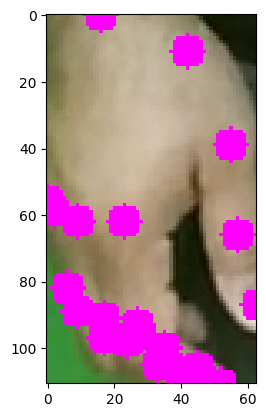

KeyboardInterrupt: 

In [10]:

import shutil
import cv2 
import mediapipe as mp 
  
# Used to convert protobuf message  
# to a dictionary. 
from google.protobuf.json_format import MessageToDict 

result_path = 'results_hand'
if os.path.exists(result_path):
    shutil.rmtree(result_path)

os.makedirs(result_path)
# Initializing the Model 
mpHands = mp.solutions.hands 
hands = mpHands.Hands( 
    static_image_mode=False, 
    model_complexity=1, 
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5, 
    max_num_hands=2) 
jdx = 0
padding = 10

for image in all_images:
    jdx += 1
    # Process the RGB image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image) 
    h, w, c = image.shape

    # If hands are present in image(frame) 
    if results.multi_hand_landmarks: 
        for handLMs in results.multi_hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            lmlist = []
            for lm in handLMs.landmark:
                cx, cy = int(lm.x * w), int(lm.y * h)
                if cx > x_max:
                    x_max = cx
                if cx < x_min:
                    x_min = cx
                if cy > y_max:
                    y_max = cy
                if cy < y_min:
                    y_min = cy
                lmlist.append([cx,cy])
                cv2.circle(image,(cx,cy),5,(255,0,255),cv2.FILLED)
            #plt.imshow(Image.fromarray(image))
            plt.imshow(Image.fromarray(image[y_min-padding:y_max+padding,x_min-padding:x_max+padding]))
            plt.show()
            aaa = 5

        # Both Hands are present in image(frame) 
        if len(results.multi_handedness) == 2: 
                # Display 'Both Hands' on the image 
            cv2.putText(img, 'Both Hands', (250, 50), 
                        cv2.FONT_HERSHEY_COMPLEX, 0.9, 
                        (0, 255, 0), 2) 

        # If any hand present 
        else: 
            for i in results.multi_handedness: 
                
                # Return whether it is Right or Left Hand 
                label = MessageToDict(i)[ 
                    'classification'][0]['label'] 

                if label == 'Left': 
                    
                    # Display 'Left Hand' on left side of window 
                    cv2.putText(img, label+' Hand', (20, 50), 
                                cv2.FONT_HERSHEY_COMPLEX, 0.9, 
                                (0, 255, 0), 2) 

                if label == 'Right': 
                    
                    # Display 'Left Hand' on left side of window 
                    cv2.putText(img, label+' Hand', (460, 50), 
                                cv2.FONT_HERSHEY_COMPLEX, 
                                0.9, (0, 255, 0), 2) 

    # # Display Video and when 'q' is entered, destroy the window 
    # cv2.imshow('Image', img) 

# import shutil
# result_path = 'results_hand'
# if os.path.exists(result_path):
#     shutil.rmtree(result_path)

# os.makedirs(result_path)

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
# jdx = 0
# for image in all_images:
#     jdx += 1
#     # Detect faces
#     gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray_img, 1.2, minSize = [30,30])
#     #plt.imshow(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
#     #plt.show()
#     for idx, (x, y, w, h) in enumerate(faces):
#         padding = 10
#         face_img = image[y - padding:y + h + padding, x - padding:x + w + padding]
#         cropped_head_pil = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
#         #plt.imshow(cropped_head_pil)
#         cv2.imwrite(result_path + '/' + str(jdx) + 'face' + str(idx) + '.jpg', face_img) 



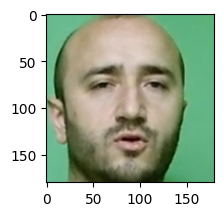

In [4]:

for idx, (x, y, w, h) in enumerate(faces):
    padding = 10
    face_img = img[y - padding:y + h + padding, x - padding:x + w + padding]
    cropped_head_pil = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.subplot(2, faces.shape[0], idx + 1)
    plt.imshow(cropped_head_pil)

plt.show()
